In [1]:
import planner as pl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

### define a square map

In [2]:
squareMap = pl.SquareMap(0, 0, 100, 50)

### define planner

In [3]:
# starting node
start = pl.TreeNode(10, 10)
goal = pl.TreeNode(73, 40)
planner = pl.RRTPlanner(squareMap, start, goal, 10000, 5, 5, 1)

### define map and obstacles

In [4]:
planner.AddObstacles(pl.Obstacles(40, 20, 8))
planner.AddObstacles(pl.Obstacles(60, 35, 5))

### show the map and the obstacles

can not find path to goal!
[0, 2, 3, 4, 5, 6, 10, 12, 14, 15, 16, 20, 21, 23, 24, 28, 36, 45, 49, 52, 53]


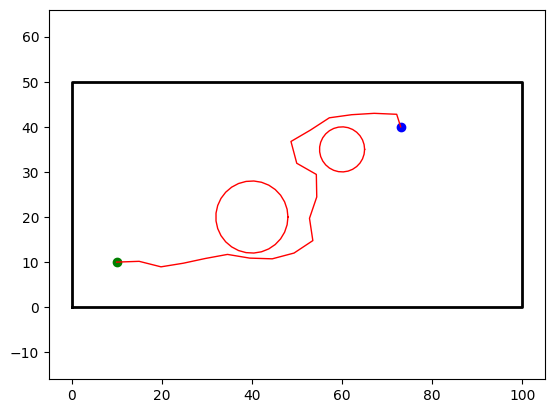

In [5]:
x_m, y_m = pl.GenerateMapBorder(squareMap)
ob_coordinate = list()
for ob in planner.obstacleList:
    x, y = pl.GenerateCircles(ob)
    ob_coordinate.append([x, y])

fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(x_m, y_m, color = 'k', linewidth=2.0)
# calling pause function in interactive mode to wait for 
# drawing to complete
for X in ob_coordinate:
    ax.plot(X[0], X[1], color = 'r', linewidth=1.0)

# start location
ax.scatter(planner.start_pos.pos_x, planner.start_pos.pos_y, c='g')
# end location
ax.scatter(planner.goal_pos.pos_x, planner.goal_pos.pos_y, c='b')

planner.Calculate()

if planner.pathFound:
    # plot the path
    res = planner.FormPath()
    print(res)
    x = list()
    y = list()
    for nodeIdx in res:
        x.append(planner.nodeList[nodeIdx].pos_x)
        y.append(planner.nodeList[nodeIdx].pos_y)
    ax.plot(x, y, color = 'r', linewidth=1)
else:
    print("can not find path!")

plt.show()

### perform one step update